In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
csv_file_path = '/kaggle/input/snowcsv/labels_my-project-name_2023-09-23-04-37-48.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
image_dir = '/kaggle/input/snowimg-final'

In [3]:
column_to_check_duplicates = 'image_name'

# Use the drop_duplicates() method to drop duplicates
data = data.drop_duplicates(subset=[column_to_check_duplicates])

In [4]:
# Function to create the image source path
def create_image_source_path(row):
    image_name = row['image_name']  
    image_path = os.path.join(image_dir, image_name)
    return image_path

# Add a new 'imagesrc' column with image file paths
data['imagesrc'] = data.apply(create_image_source_path, axis=1)



print(f"CSV file with 'imagesrc' column saved to {csv_file_path}")
data

CSV file with 'imagesrc' column saved to /kaggle/input/snowcsv/labels_my-project-name_2023-09-23-04-37-48.csv


,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,imagesrc
0,yes,525,277,306,181,ds1.jpg,900,596,/kaggle/input/snowimg-final/ds1.jpg
1,yes,352,420,38,83,ds10.jpg,749,1000,/kaggle/input/snowimg-final/ds10.jpg
2,yes,130,190,8,16,ds100.jpg,201,251,/kaggle/input/snowimg-final/ds100.jpg
3,yes,153,81,7,12,ds101.jpg,275,183,/kaggle/input/snowimg-final/ds101.jpg
6,yes,188,59,38,49,ds102.jpg,259,194,/kaggle/input/snowimg-final/ds102.jpg
...,...,...,...,...,...,...,...,...,...
338,no,0,4,2880,1616,no116.jpg,2880,1620,/kaggle/input/snowimg-final/no116.jpg
339,no,2,1,1198,673,no117.jpg,1200,674,/kaggle/input/snowimg-final/no117.jpg
340,no,6,2,2554,1705,no118.jpg,2560,1707,/kaggle/input/snowimg-final/no118.jpg
341,no,2,1,610,407,no119.jpg,612,408,/kaggle/input/snowimg-final/no119.jpg


In [5]:
image_names_to_remove = ["ds17.jpg", "ds71.jpg"]

# Use boolean indexing to filter and keep rows where the image_name is not in the list
data = data[~data['image_name'].isin(image_names_to_remove)]

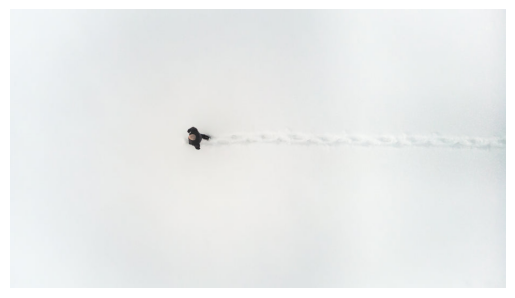

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
image_path = "/kaggle/input/snowimg-final/ds8.jpg"  # Replace with the path to your image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks (optional)
plt.show()

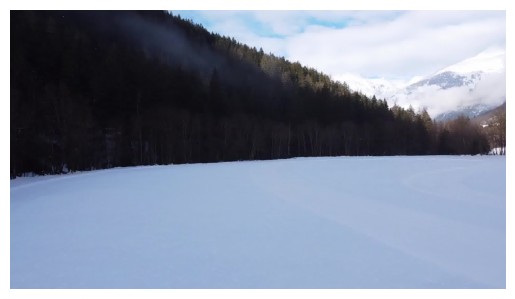

In [7]:
image_path = "/kaggle/input/snowimg-final/no78.jpg"  # Replace with the path to your image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks (optional)
plt.show()

In [8]:
import pandas as pd
from PIL import Image
import numpy as np

# Create lists to store preprocessed images and corresponding labels
preprocessed_images = []
labels = []

# iterating through the csv and adding images to X and corresponding label to Y
for index, row in data.iterrows():
    image_path = os.path.join(image_dir, row['imagesrc'])
    img = Image.open(image_path)
    img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    preprocessed_images.append(img)
    labels.append(row['label_name'])



In [127]:
X = np.array(preprocessed_images)
y = np.array(labels)


In [128]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels using fit_transform
y = label_encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [129]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
#CREATING A CNN MODEL
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')  # num_classes is the number of classes
])

In [166]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use appropriate loss function
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss}, Validation accuracy: {accuracy}')

Epoch 1/10
6/6 [==============================] - 2s 91ms/step - loss: 0.1343 - accuracy: 0.9632 - val_loss: 2.0897 - val_accuracy: 0.7292
Epoch 2/10
6/6 [==============================] - 0s 55ms/step - loss: 0.2311 - accuracy: 0.9316 - val_loss: 1.9996 - val_accuracy: 0.7500
Epoch 3/10
6/6 [==============================] - 0s 47ms/step - loss: 0.1438 - accuracy: 0.9421 - val_loss: 1.6622 - val_accuracy: 0.8125
Epoch 4/10
6/6 [==============================] - 0s 47ms/step - loss: 0.1875 - accuracy: 0.9632 - val_loss: 1.2786 - val_accuracy: 0.8333
Epoch 5/10
6/6 [==============================] - 0s 50ms/step - loss: 0.0581 - accuracy: 0.9737 - val_loss: 1.0194 - val_accuracy: 0.7708
Epoch 6/10
6/6 [==============================] - 0s 46ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0524 - val_accuracy: 0.7083
Epoch 7/10
6/6 [==============================] - 0s 45ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 2.1710 - val_accuracy: 0.7083
Epoch 8/10
6/6 [===========

**VALIDATION ACCURACY OF CNN** 0.75

In [152]:
model.save('cnn.h5')

In [145]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
input_image_path = '/kaggle/input/snowimg-final/ds8.jpg'  # Replace with the path to your input image
img = image.load_img(input_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = img / 255.0  # Normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension



In [146]:
predictions = model.predict(img)


1/1 [==============================] - 0s 23ms/step


In [147]:
predicted_class = np.argmax(predictions, axis=1)

In [148]:
if predicted_class==1:
    print("human detected")
else:
    print("no human detected")


human detected


In [155]:
import joblib
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow import keras
X_tr=X_train.reshape(X_train.shape[0], -1)
svm_classifier = svm.SVC(kernel='rbf', gamma='scale')  # You can choose the appropriate kernel
svm_classifier.fit(X_tr, y_train)
joblib.dump(svm_classifier, 'svm.h5')

['svm.h5']

In [137]:
X_va=X_val.reshape(X_val.shape[0], -1)
y_pred = svm_classifier.predict(X_va)

In [138]:
Accuracy = accuracy_score(y_val, y_pred)

In [139]:
print(Accuracy)

0.8125


**ACCURACY FOR SVM: 88.41% for svm**

In [140]:
from IPython.display import Image, display
import math

In [178]:
#PREDICTOR FUNCTION
def predictor(img_path):
    display(Image(filename=img_path))
    p=img_path
    img = image.load_img(input_image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)
    if predicted_class==1:
        print("cnn detects human")
    else:
        print("cnn does not detect human")
    img=img.reshape(img.shape[0], -1)
    pred=svm_classifier.predict(img)
    if predicted_class==1:
        print("svm detects human")
    else:
        print("svm does not detect human")
    final_predictions = ( predicted_class + pred ) / 2
    print(final_predictions)
    
    
    
    
    

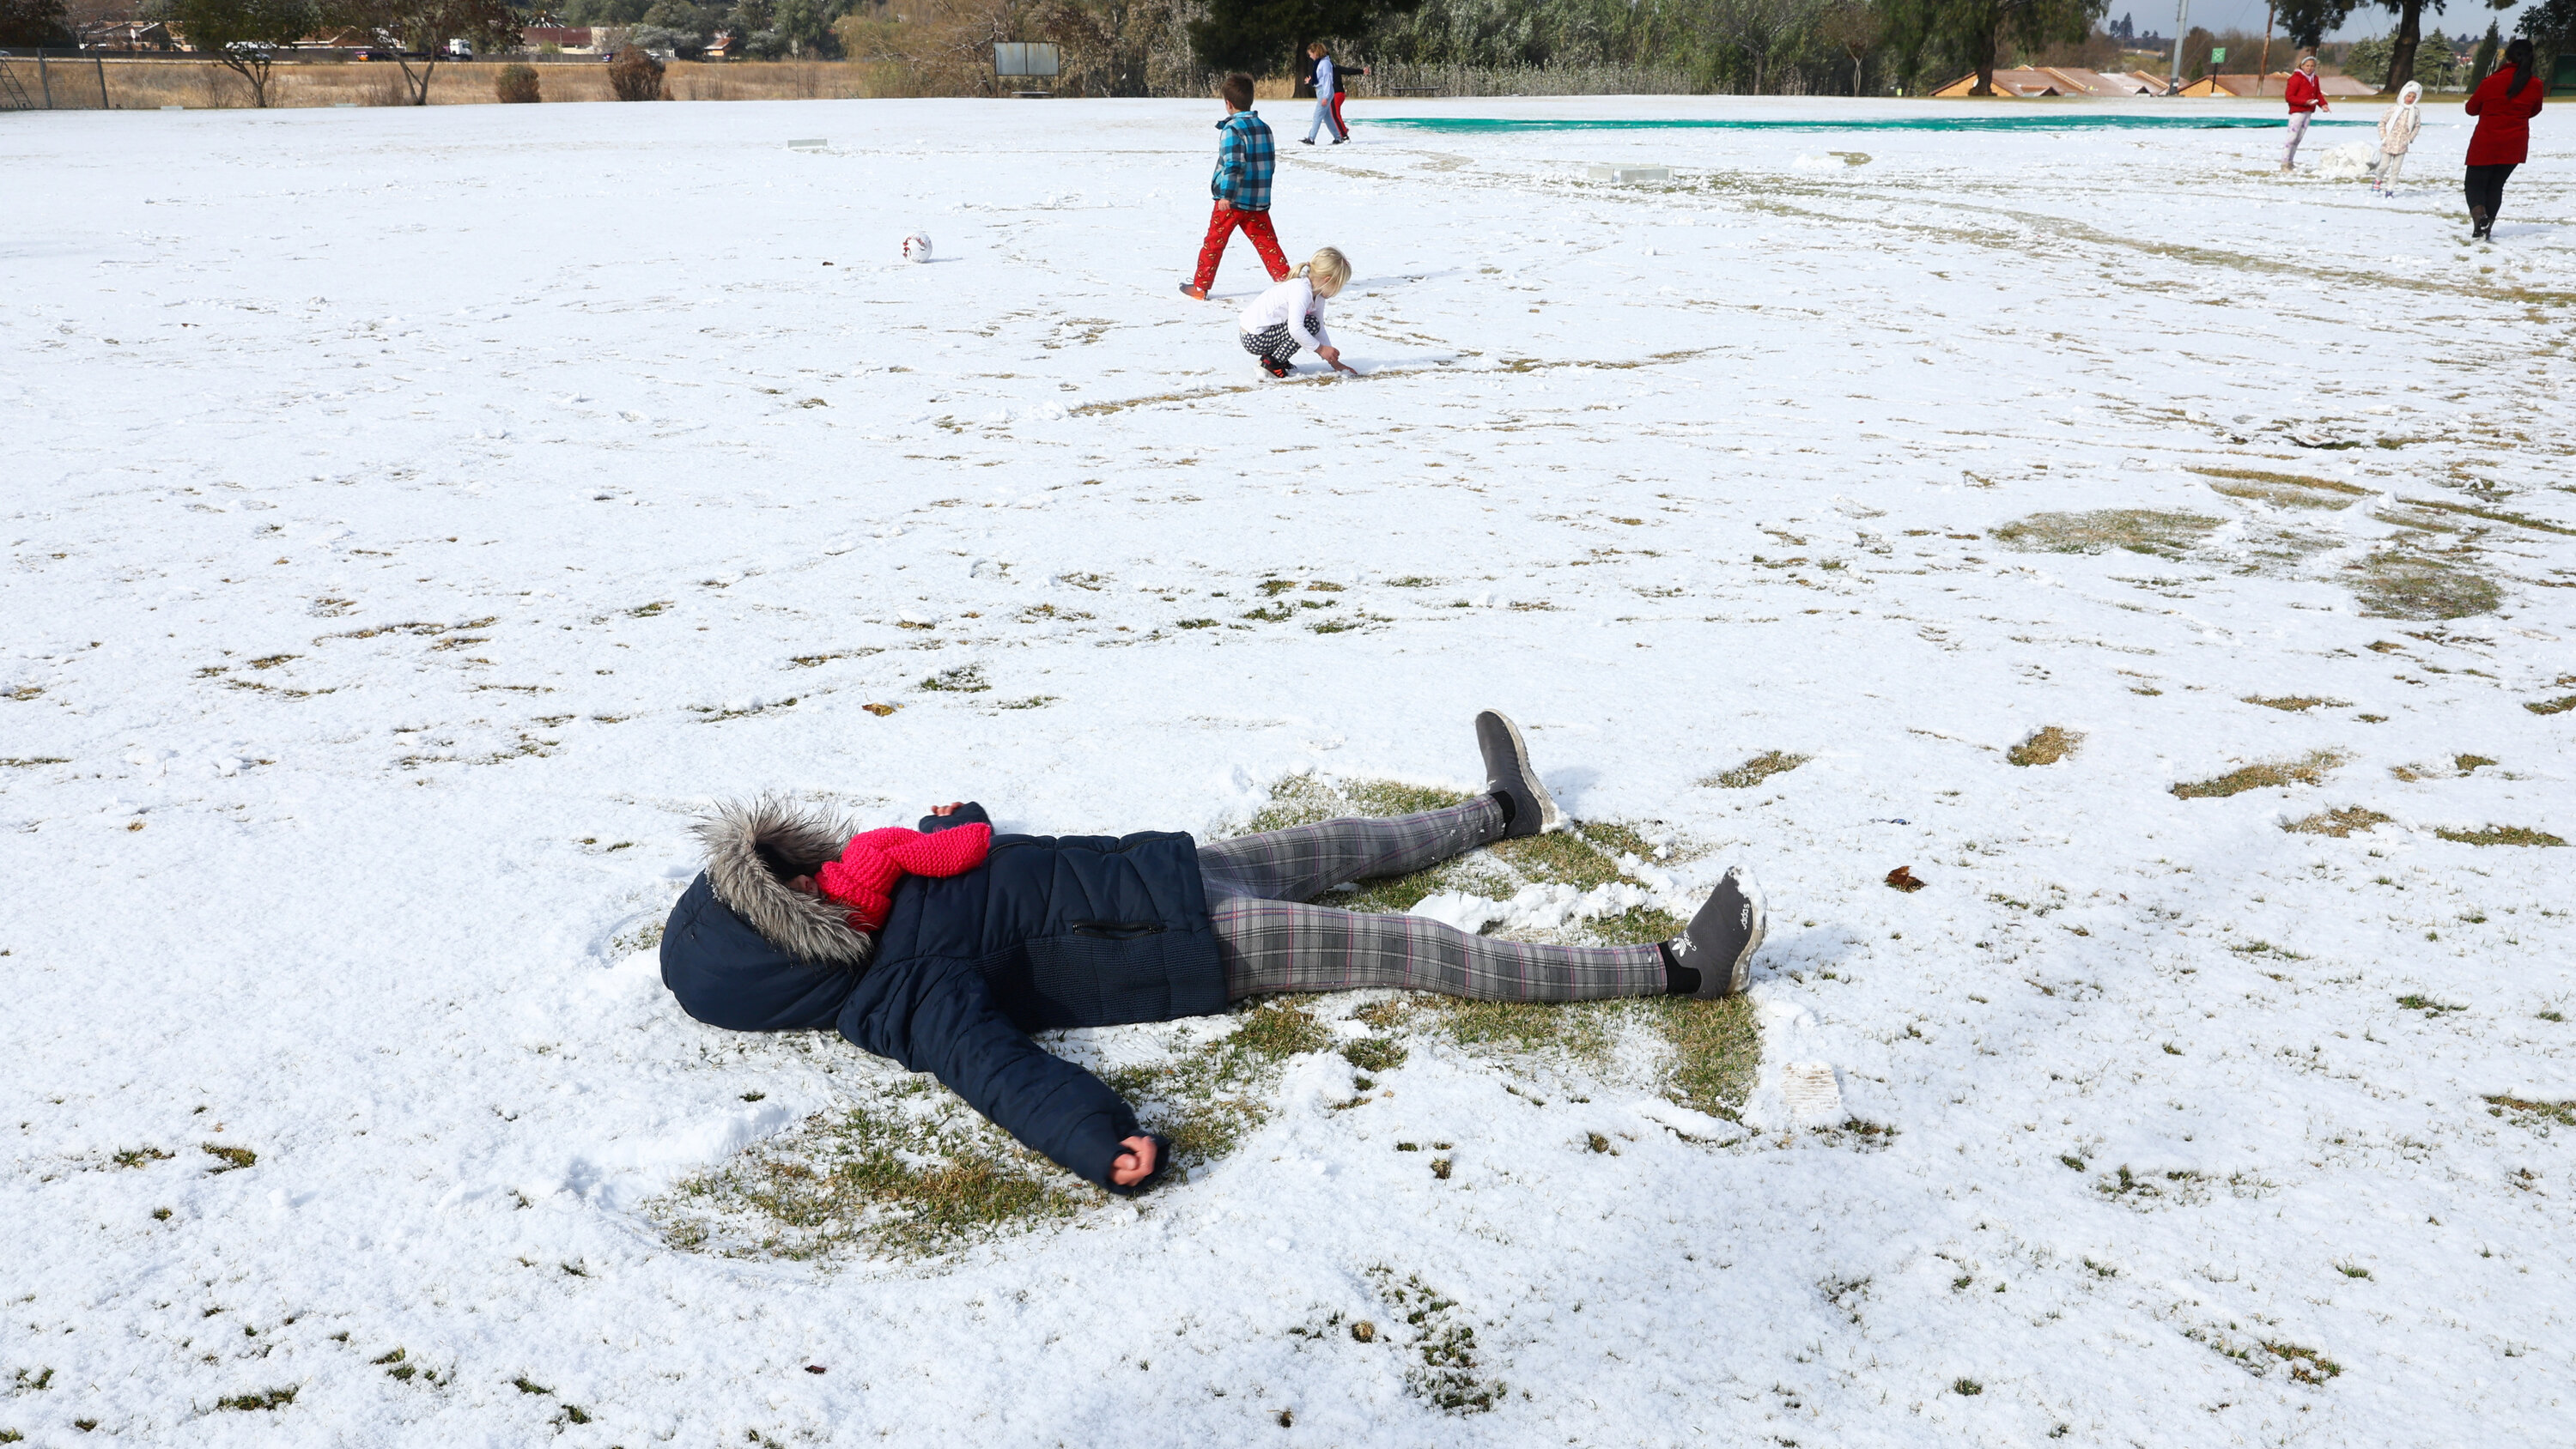

1/1 [==============================] - 0s 26ms/step
cnn detects human
svm detects human
[1.]


In [142]:
#PREDICTING USING AN YES IMAGE
img_path='/kaggle/input/testsnow/yes2.jpg'
predictor(img_path)

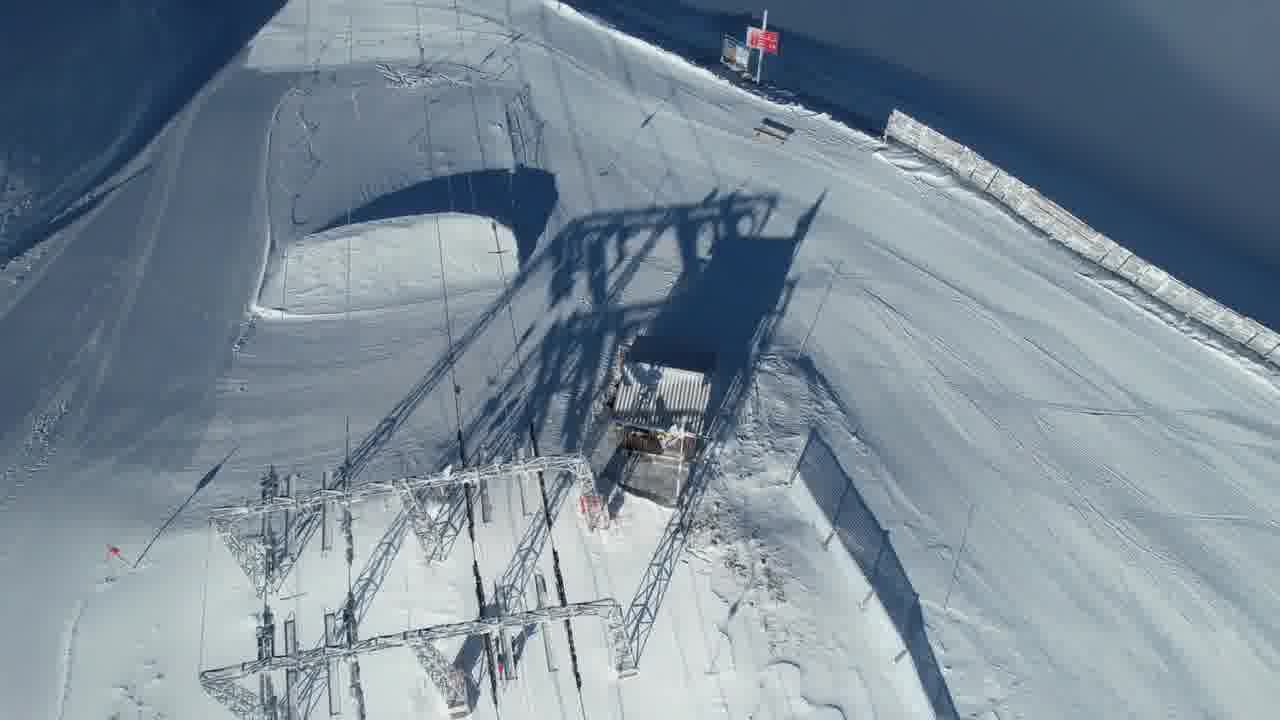

1/1 [==============================] - 0s 20ms/step
cnn does not detect human
svm detects human
[1.]


In [177]:
#PREDICTING USING AN NO IMAGE
img_path='/kaggle/input/snowimg-final/no90.jpg'
predictor(img_path)